Zmierz się z problemem identyfikacji rodzaju szkła. W tym celu wykorzystaj jeden ze zbiorów danych
UCI - GLASS. Zadania powinny być wykonane z pomocą Pythona i/lub WEKI. Punktacja:
1. eksploracja danych – przedstaw podstawowe dane statystyczne i uwagi dotyczące cech i etykiet
zbioru danych. (10 punktów)
2. przygotowanie danych – podziel dane na zestaw uczący i walidacyjny (alternatywnie użyj walidacji krzyżowej), zbadaj wpływ różnego typu przetworzenia danych na wyniki klasyfikacji (proponowane: normalizacja, standaryzacja, dyskretyzacja, selekcja cech, PCA) - czyli wykonaj porównanie wyników bez przetworzenia danych z rezultatami po ich przetworzeniu, wykorzystując
co najmniej 2 metody różnego typu (osobno). (30 punktów)
Bonus – usuń 5% wartości cech i przygotuj dane stosując metody radzenia sobie z brakującymi
danymi. (5 punktów)
3. klasyfikacja – przetestuj klasyfikatory i zbadaj wpływ na wyniki: naiwny klasyfikator Bayesa oraz
drzewo decyzjne używając przynajmniej 3 różnych zestawów hiperparametrów. (40 punktów)
Bonus – Przetestuj (ze zrozumieniem!) bardziej zaawansowane algorytmy, takie jak Las losowy
czy Klasyfikator wektorów nośnych (SVM, z ang. Support Vector Machines). (5 punktów)
4. ocena klasyfikacji – do porównania wyników różnego typu przygotowania danych oraz wykorzystanego klasyfikatora użyj poznanych metryk oceny klasyfikacji i zinterpretuj wyniki. (20
punktów)
4
Do zadania przygotuj raport zawierający krótki opis wszystkich wykonywanych kroków oraz rezultatów zadania (najlepiej zebranych tabeli) wraz z interpretacją. W raporcie wskaż wykorzystane
materiały źródłowe oraz krótko opisz biblioteki wykorzystane przy implementacji. Raport wyślij prowadzącemu przynajmniej na 24 godziny przed oddaniem listy.


Importowanie danych

In [116]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
glass_data = pd.read_csv(data_url, names=column_names)


print(glass_data.head(20))

    Id       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
0    1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
1    2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2    3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3    4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4    5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
5    6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1
6    7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
7    8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00     1
8    9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00     1
9   10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11     1
10  11  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24     1
11  12  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00     1
12  13  1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.0  0.24     1
13  14

eksploracja danych

In [117]:
glass_data.shape

(214, 11)

dataset ma 214 wierszy i 10 kolumn

In [118]:
glass_data.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

dataset nie ma brakujących danych

pokaz type

In [119]:
print(glass_data['Type'].value_counts())

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


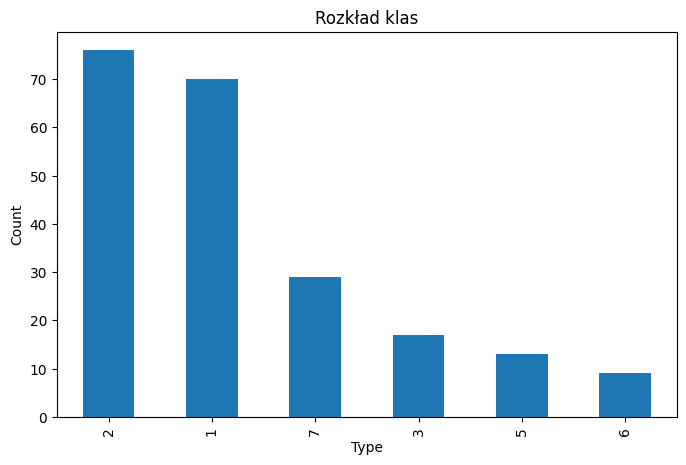

In [120]:
plt.figure(figsize=(8, 5))
glass_data['Type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Rozkład klas')
plt.show()

# X = glass_data.drop('Type', axis=1)
# y = glass_data['Type']



In [121]:
print(glass_data.describe())

               Id          RI          Na          Mg          Al          Si   
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000  \
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219    0.097439    2.103739 

wynioski z eksploracji danych:
Powyższe statystyki pokazują, że dane we wszystkich atrybutach nie są w tym samym zakresie, więc najpierw znormalizujemy dane

przygotowanie danych

Usuwanie niepotrzebnej kolumny Id

In [122]:
glass_data.drop(['Id'], axis=1, inplace=True)
glass_data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


Odseparowanie kolumny klasy od reszty danych

In [123]:
X = glass_data.drop('Type', axis=1)
y = glass_data['Type']

X.shape

(214, 9)

In [124]:
type(X)

pandas.core.frame.DataFrame

In [125]:
y.shape

(214,)

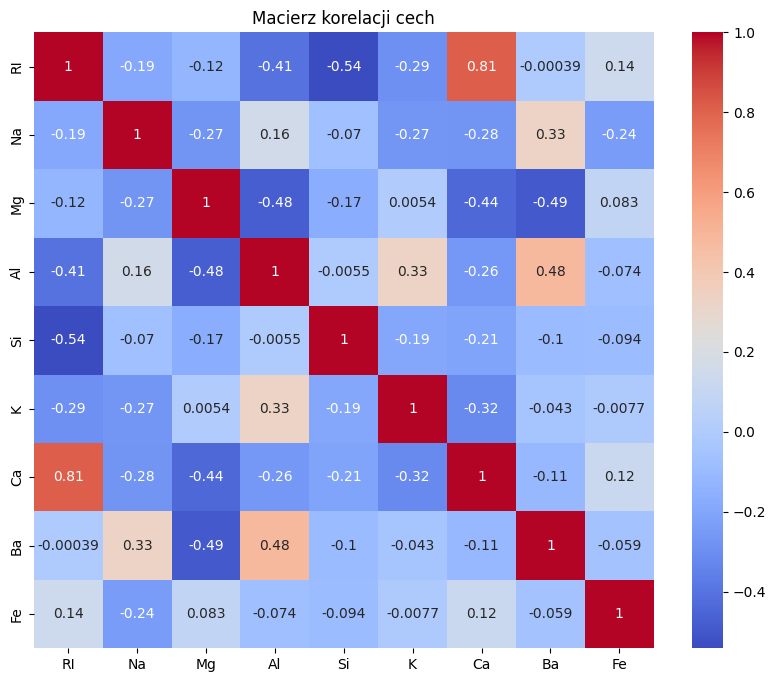

In [126]:
import seaborn as sns
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji cech')
plt.show()

Nasz wykres pokazuje korelację między różnymi cechami Wnioski:

RI i Ca mają silną korelację między sobą
AI i ba mają pośrednią korelację między sobą

Train Test Split Podział danych na zestaw uczący i walidacyjny


podziel dane na zestaw uczący i walidacyjn

In [127]:
# split data into train and vaildation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [128]:
# how to show splited data
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(160, 9) (54, 9) (160,) (54,)


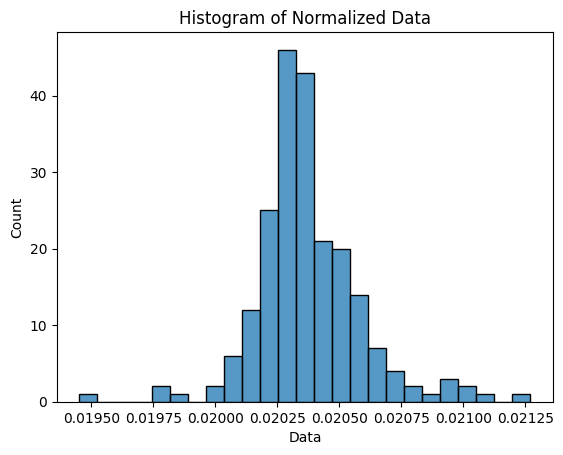

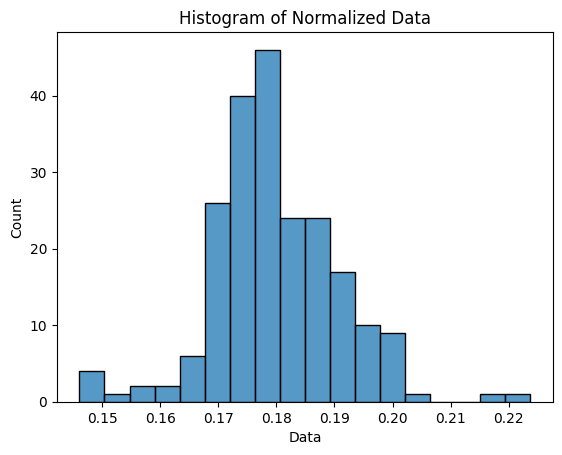

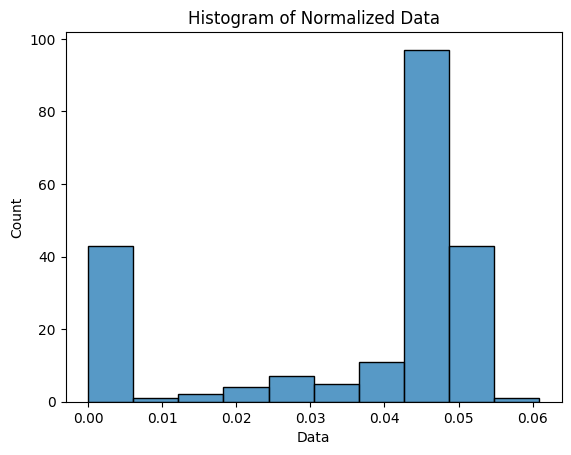

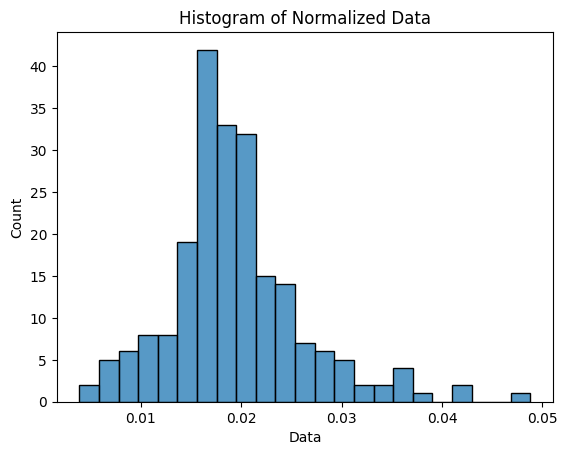

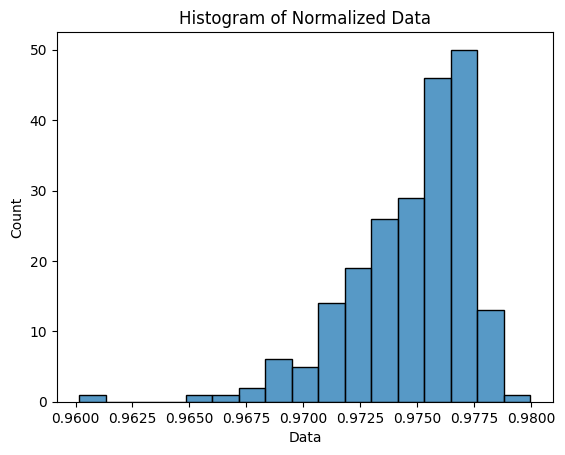

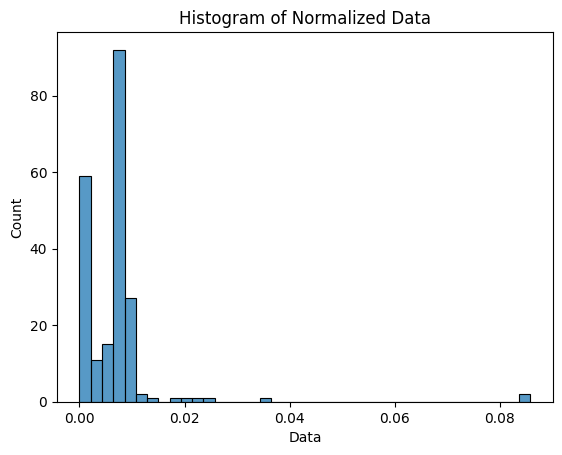

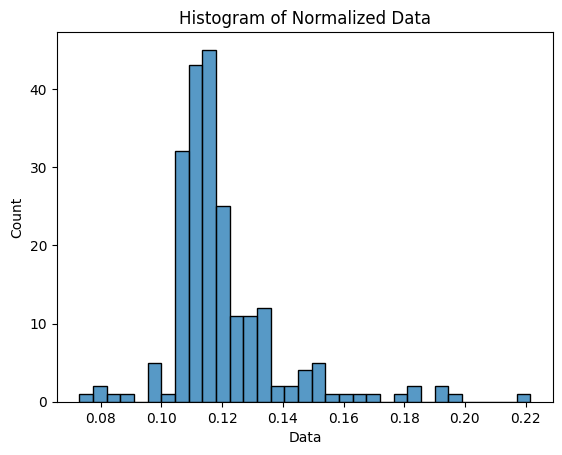

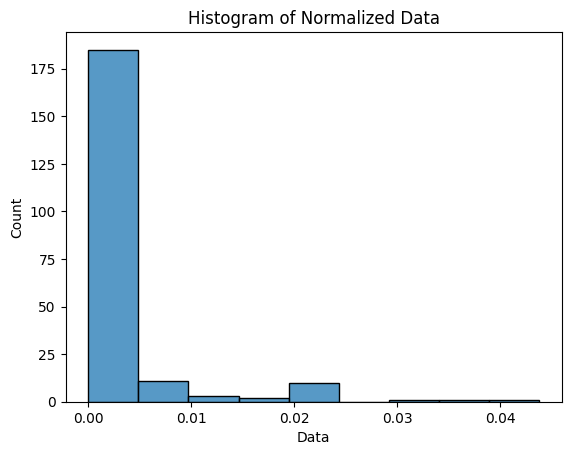

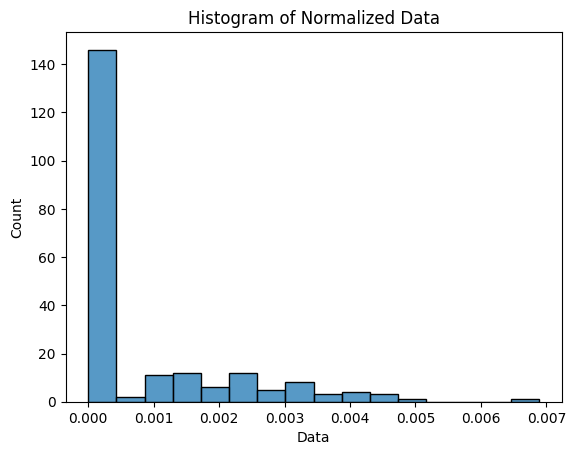

In [129]:
# normalizacja, standaryzacja, dyskretyzacja, selekcja cech, PCA
# normlaize data and store it in normalized_X variable
normalized_X = Normalizer().fit_transform(X)
# show first 5 rows of normalized_X
normalized_X_DF = pd.DataFrame(normalized_X, columns=X.columns)

# show results as a histogram

for column in normalized_X_DF.columns:
    sns.histplot(data=normalized_X_DF[column])
    plt.xlabel('Data')
    plt.ylabel('Count')
    plt.title('Histogram of Normalized Data')
    plt.show()



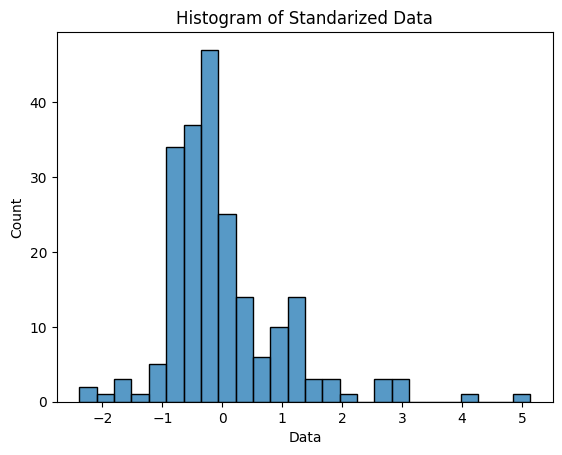

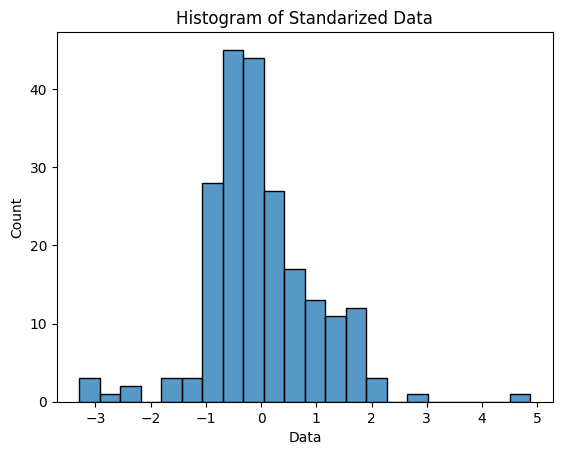

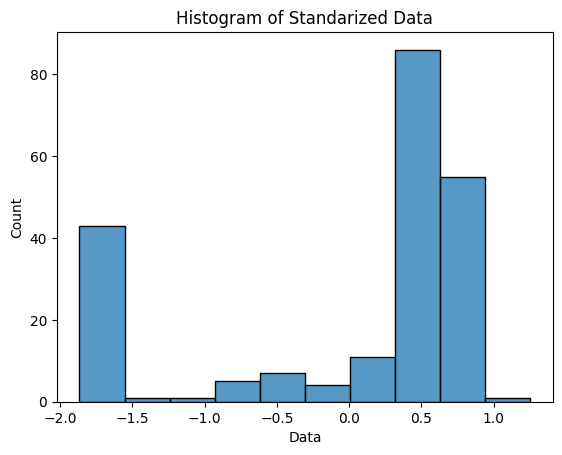

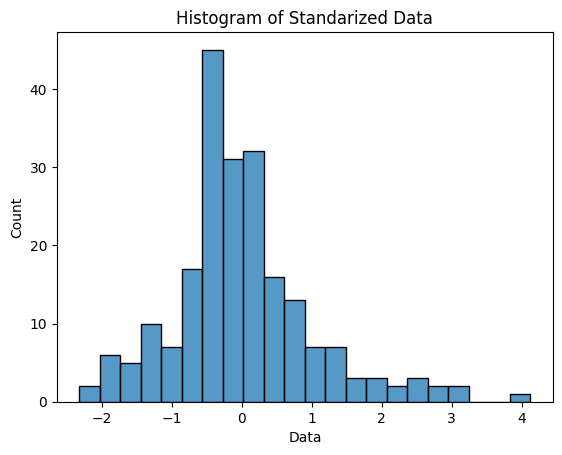

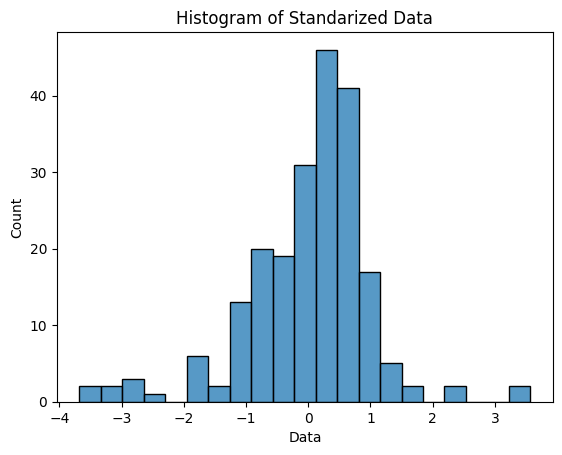

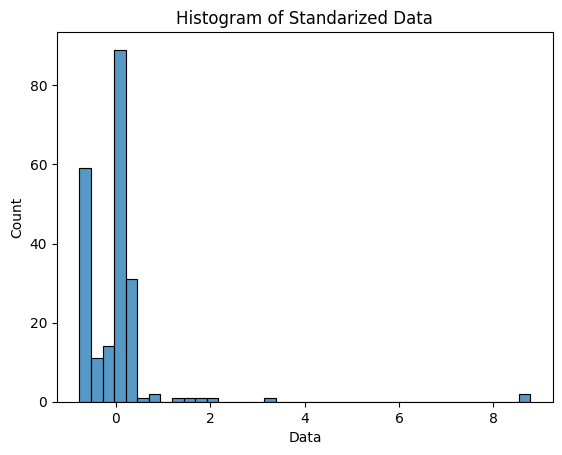

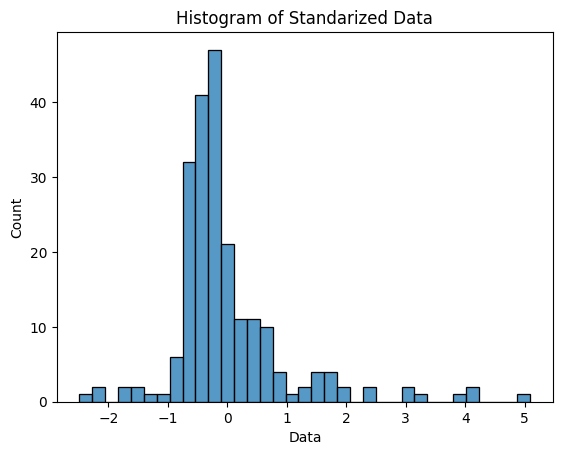

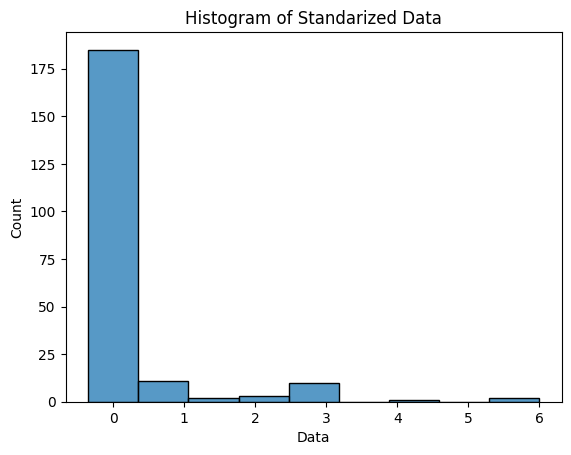

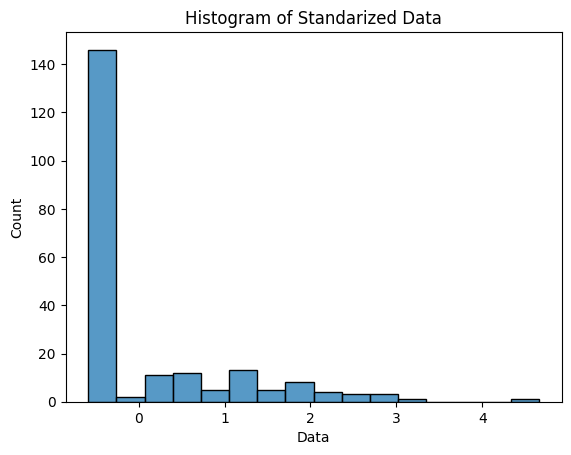

In [130]:
# standarize data and store it in standarized_X variable
standarized_X = StandardScaler().fit_transform(X)
# show first 5 rows of standarized_X
standarized_X_DF = pd.DataFrame(standarized_X, columns=X.columns)

# show results as a histogram

#  i want to display histogram of eacy column in standarized_X_DF
for column in standarized_X_DF.columns:
    sns.histplot(data=standarized_X_DF[column])
    plt.xlabel('Data')
    plt.ylabel('Count')
    plt.title('Histogram of Standarized Data')
    plt.show()


In [131]:

# PCA - Principal Component Analysis - reduce dimensionality of data
# use PCA to reduce dimensionality of data of X 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_DF.head()

,PC1,PC2
0,-1.431425,-1.102115
1,-1.436707,0.343585
2,-1.427322,0.345720
3,-1.257825,-0.249060
4,-1.312466,-0.018405


In [132]:
# discrete data X to discrete_X
discrete_X = pd.DataFrame(pd.cut(X['RI'], bins=3, labels=[1, 2, 3]))
discrete_X.head()


,RI
0,2
1,1
2,1
3,1
4,1


zbadaj wpływ różnego typu przetworzenia danych na wyniki klasyfikacji (proponowane: normalizacja, standaryzacja, dyskretyzacja, selekcja cech, PCA) - czyli wykonaj porównanie wyników bez przetworzenia danych z rezultatami po ich przetworzeniu, wykorzystując
co najmniej 2 metody różnego typu (osobno). (30 punktów)

In [133]:
## Flattening the array
# y_train = y_train.values.ravel()
# y_val = y_val.values.ravel()

In [134]:
print('Shape of X_train = ' + str(X_train.shape))
print('Shape of X_test = ' + str(X_val.shape))
print('Shape of y_train = ' + str(y_train.shape))
print('Shape of y_test = ' + str(y_val.shape))

Shape of X_train = (160, 9)
Shape of X_test = (54, 9)
Shape of y_train = (160,)
Shape of y_test = (54,)


klasyfikacja – przetestuj klasyfikatory i zbadaj wpływ na wyniki: naiwny klasyfikator Bayesa oraz
drzewo decyzjne używając przynajmniej 3 różnych zestawów hiperparametrów. (40 punktów)
Bonus – Przetestuj (ze zrozumieniem!) bardziej zaawansowane algorytmy, takie jak Las losowy
czy Klasyfikator wektorów nośnych (SVM, z ang. Support Vector Machines). (5 punktów)

In [135]:
from sklearn.tree import DecisionTreeClassifier

Scores = []

for i in range(1):
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')
    
    score = tree.score(X_val,y_val)
    Scores.extend([accuracy, precision, recall, f1])

print(Scores)

[0.7037037037037037, 0.6474802201582387, 0.5903996101364523, 0.6030980228348649]
